In [1]:
from raspberry_listener.datatypes import Sensor, SensorData, SensorReading, SensorType
from raspberry_listener.remotereader import download_archive
import polars as pl
import matplotlib.pyplot as plt
from dataclasses import dataclass

In [2]:
archive = download_archive()

In [3]:
sensor_combinations = {"humidity": ["DHT11"], "temperature": ["DHT11","PI_CPU", "DS18B20"]}

In [4]:
df = pl.read_parquet(archive)

In [36]:
def lineplots(df: pl.DataFrame, sensor_type, sensor):
    def get_timesorted_single_sensor_frame(df: pl.DataFrame) -> pl.DataFrame:
        single_sensor_df = df.lazy().filter(pl.col("sensor_type").is_in([sensor_type]) & pl.col("sensor").is_in([sensor]))
        return single_sensor_df.sort(pl.col("timestamp")).collect()
    single_sensor_df= get_timesorted_single_sensor_frame(df)
    plt.figure()
    timeseries = single_sensor_df.select(pl.col("timestamp"))
    readings = single_sensor_df.select(pl.col("reading"))
    plt.xticks(rotation=30)
    plt.plot(timeseries, readings)
    plt.title(f"{sensor_type}, {sensor}")
    

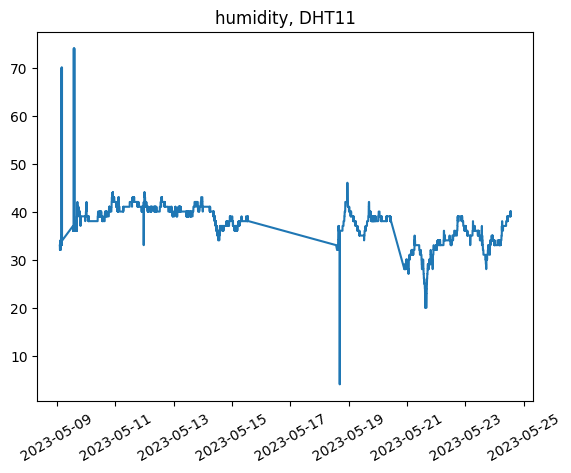

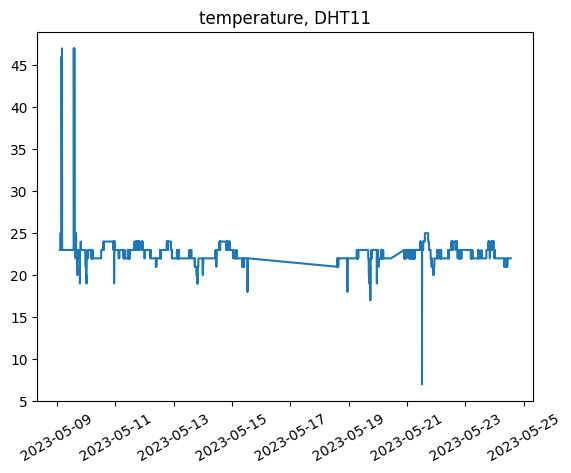

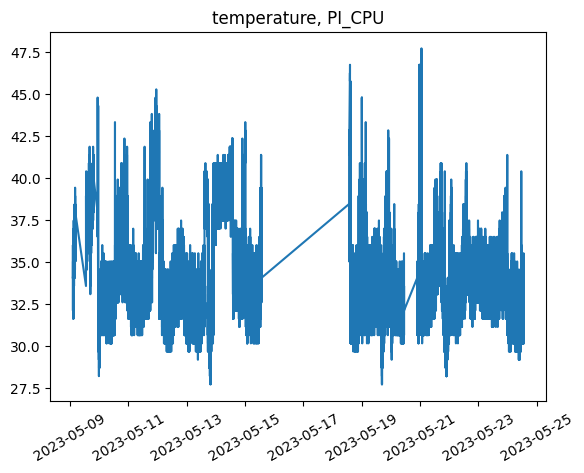

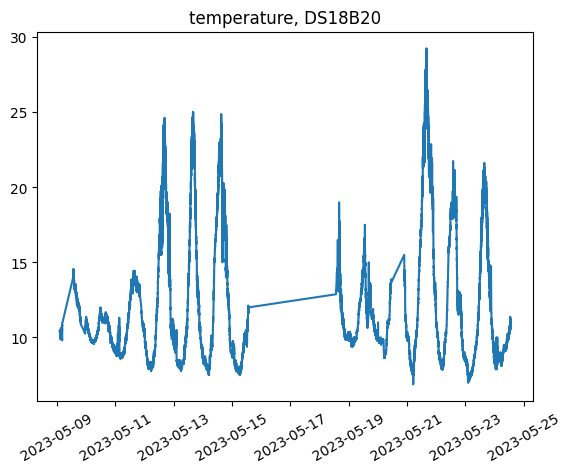

         198504 function calls (193452 primitive calls) in 0.669 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       12    0.237    0.020    0.237    0.020 {method 'collect' of 'builtins.PyLazyFrame' objects}
       96    0.171    0.002    0.171    0.002 {method 'astype' of 'numpy.ndarray' objects}
  632/496    0.062    0.000    0.065    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
        8    0.041    0.005    0.100    0.013 dates.py:321(_dt64_to_ordinalf)
        8    0.024    0.003    0.024    0.003 {method '__copy__' of 'numpy.ndarray' objects}
        4    0.024    0.006    0.024    0.006 {built-in method matplotlib._path.update_path_extents}
      840    0.006    0.000    0.006    0.000 {built-in method numpy.asarray}
      872    0.003    0.000    0.016    0.000 artist.py:1180(_update_props)
9492/8528    0.003    0.000    0.004    0.000 artist.py:319(stale)
        8    0.003    0

In [37]:
def plot_all():
    for sensor_type, sensors in sensor_combinations.items():
        for sensor in sensors:
            lineplots(df, sensor_type, sensor)
%prun plot_all()
